# Loan Appliction Status Prediction_Project

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [6]:
df=pd.read_csv('loan-prediction.csv')

In [7]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [58]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [8]:
df.shape

(614, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

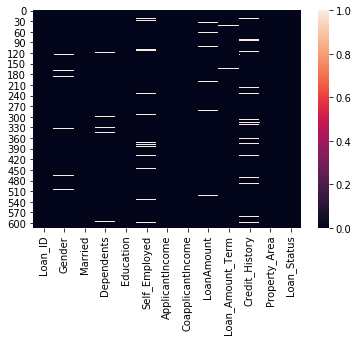

In [11]:
sns.heatmap(df.isnull())
plt.show()

We can see that there are nan values in the given dataset. So, we will handle the nan values in the future processes.
Statistical Summary.

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Though the column dependents are in integer format it is not showing in the statistical summary. So let's check the values in this column. Also, the min and max values have a high difference. Also, the Standard deviation is high. So, there will be skewness in the data.
Analysis.

# EDA

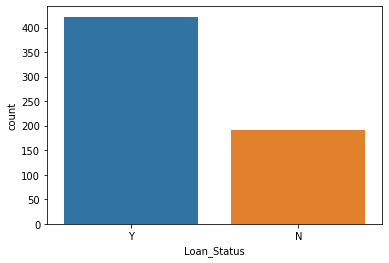

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
sns.countplot(x='Loan_Status',data=df)
plt.show()
df['Loan_Status'].value_counts()

We can see that in the given data set there are 422 approval loans data and 192 non approval data.Let's separate the categorical data and Numerical data for analysis.

In [14]:
cate=['Gender', 'Married','Education','Self_Employed','Property_Area','Dependents','Credit_History']
Num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

Male      489
Female    112
Name: Gender, dtype: int64


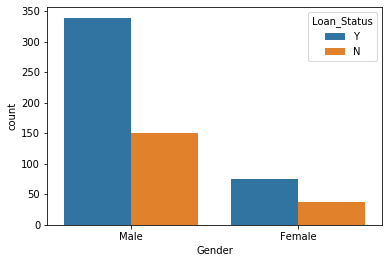

Yes    398
No     213
Name: Married, dtype: int64


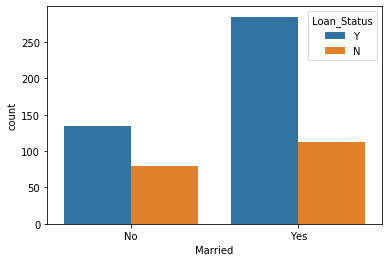

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


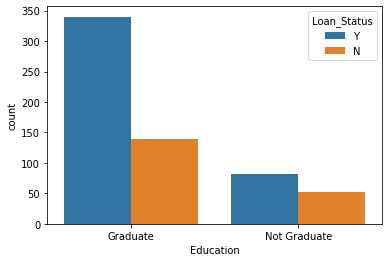

No     500
Yes     82
Name: Self_Employed, dtype: int64


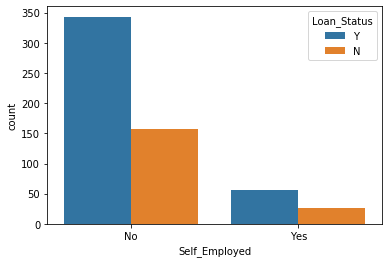

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


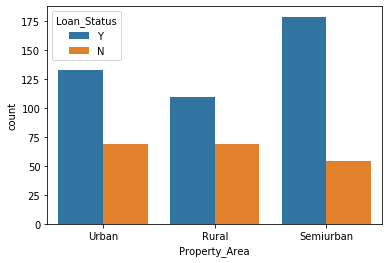

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


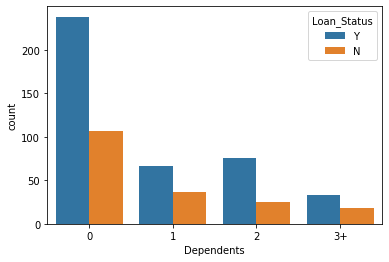

1.0    475
0.0     89
Name: Credit_History, dtype: int64


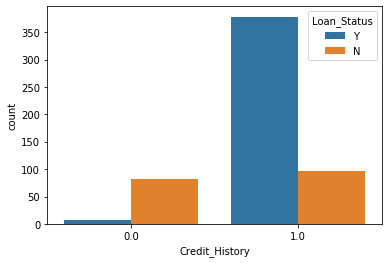

In [15]:
for m in cate:
    sns.countplot(x=m,hue='Loan_Status',data=df)
    print(df[m].value_counts())
    plt.show()

People who mostly got approved there lone are: * Male * people with Graduate and who got married *Also, people who are not self employed * and people from Semi Urban. *We can see that people who are independent without depending with credit score 1.0 got loans approved.
Checking skewness and outliers.

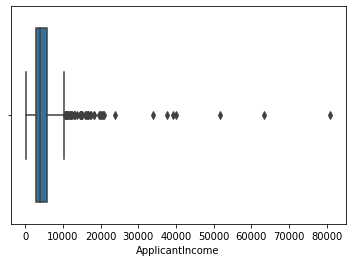

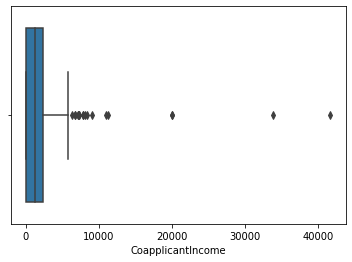

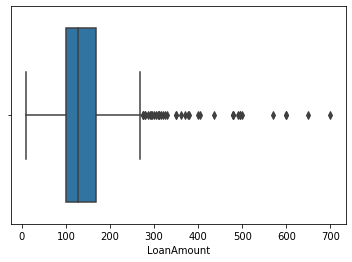

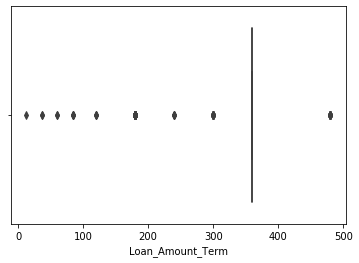

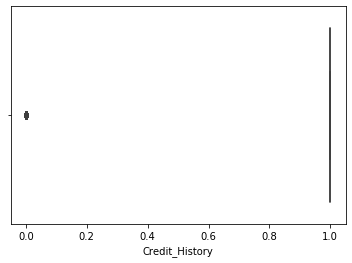

In [18]:
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()

We can see that there is Skewness and Outliers in the dataset.
Missing values

In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imp=SimpleImputer(missing_values=np.nan, strategy='mean')

In [22]:
df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term']=imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))

In [23]:
impl=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [24]:
df['Credit_History']=impl.fit_transform(df['Credit_History'].values.reshape(-1,1))
df['Dependents']=impl.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed']=impl.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Married']=impl.fit_transform(df['Married'].values.reshape(-1,1))
df['Gender']=impl.fit_transform(df['Gender'].values.reshape(-1,1))

In [25]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We removed all null values in the dataset.
Treating Skewness and Outliers

In [26]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

# Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()

In [29]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y


In [30]:
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

We see that there is 3+ in the Dependent column that's the reason we are not seeing that column in statistical summary. So we will replace this 3+ with 3 which will help us.

In [31]:
df['Dependents']=df['Dependents'].replace('3+',3)

In [32]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


Loan_ID is unique Id. So, no use of this column and we will remove it.

In [34]:
df.drop('Loan_ID',inplace=True,axis=1)

In [35]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [36]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [37]:
print(x.shape)
print(y.shape)

(614, 11)
(614,)


We know that the min and max value have high difference. So, we will do scaling process.

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc=StandardScaler()

In [40]:
x=sc.fit_transform(x)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
lr=LogisticRegression()
dr=DecisionTreeClassifier()
svc=SVC()
rf=RandomForestClassifier()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [43]:
model=[lr,dr,svc,rf]

# Splitting the data.

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

In [45]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.7891891891891892
[[ 27  35]
 [  4 119]]
              precision    recall  f1-score   support

           0       0.87      0.44      0.58        62
           1       0.77      0.97      0.86       123

    accuracy                           0.79       185
   macro avg       0.82      0.70      0.72       185
weighted avg       0.81      0.79      0.77       185



accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples

We are getting the accuracy with SVC (78%) and Random Forest classifier (76%), Logistic Regression is providing 78% and Decision tree classifier is providing 68%. But a good f1 score is not good. Let's do cross-validation and Hyperparameter tunning to get better accuracy and fewer errors.

# Cross-Validation.

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
Lrs=cross_val_score(lr,x,y,cv=5)
print('cross validation of LogisticRegression:',Lrs.mean())

cross validation of LogisticRegression: 0.8045715047314408


In [48]:
drs=cross_val_score(dr,x,y,cv=5)
print('cross validation of DecisionTreeClassiffier:',drs.mean())

cross validation of DecisionTreeClassiffier: 0.7052778888444622


In [49]:
svr=cross_val_score(svc,x,y,cv=5)
print('cross validation of SVM:',svr.mean())

cross validation of SVM: 0.8029454884712781


In [50]:
rfr=cross_val_score(rf,x,y,cv=5)
print('cross valdation of RandomForestClassifier:',rfr.mean())

cross valdation of RandomForestClassifier: 0.7850326536052246


# Hyper Parameter Tuning.

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
grid_param={'criterion':['gini','entropy']}
gd=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd.fit(x,y)
best_parameter=gd.best_params_
print('best_parameter:',best_parameter)

best_parameter: {'criterion': 'entropy'}


In [53]:
gd_pred=gd.best_estimator_.predict(x_test)

In [54]:
accuracy_score(y_test,gd_pred)

1.0

In [55]:
print(confusion_matrix(y_test,gd_pred))
print(classification_report(y_test,gd_pred))

[[ 62   0]
 [  0 123]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       123

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



Now we can see that 100% accuracy with f1 score 1 is provided by RandomForestclassifier hyper tunning. This is the best model. Let's save it.
Saving the Best Model.

In [56]:
import joblib

In [57]:
joblib.dump(gd.best_estimator_,'Loan.obj')

['Loan.obj']